# Moving Windows & Financial Data

The creator of the `pandas` library, Wes McKinney, was originally working on Finance applications when the development of pandas started. That's why pandas has a strong relationship with finance development and makes it extremely simple to manage with financial data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('data/stocks.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2016-01-01,105.26,675.89,104.66,758.88,55.48
2016-01-04,105.35,636.99,102.22,741.84,54.80
2016-01-05,102.71,633.79,102.73,742.58,55.05
2016-01-06,100.70,632.65,102.97,743.62,54.05
2016-01-07,96.45,607.94,97.92,726.39,52.17


**Google vs Amazon**

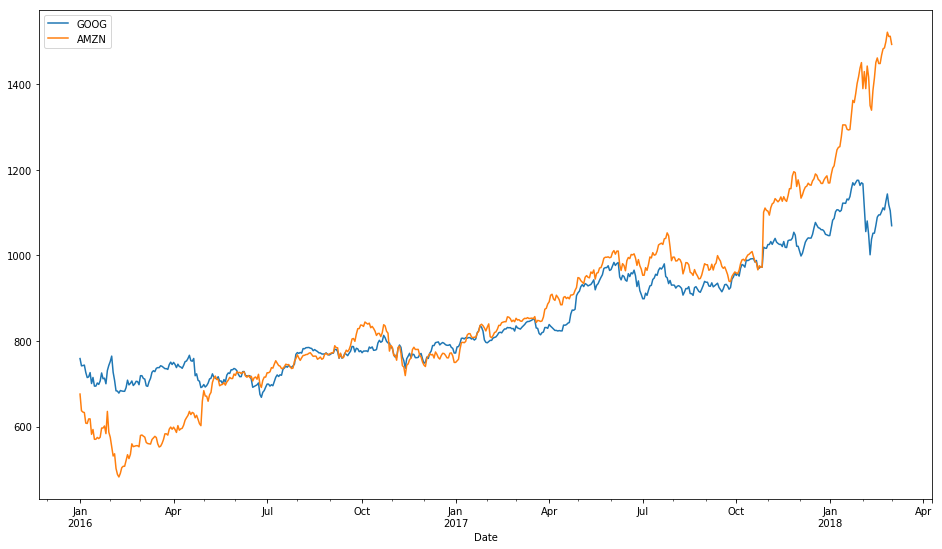

In [4]:
df[['GOOG', 'AMZN']].plot(figsize=(16, 9))

**Apple vs Facebook**

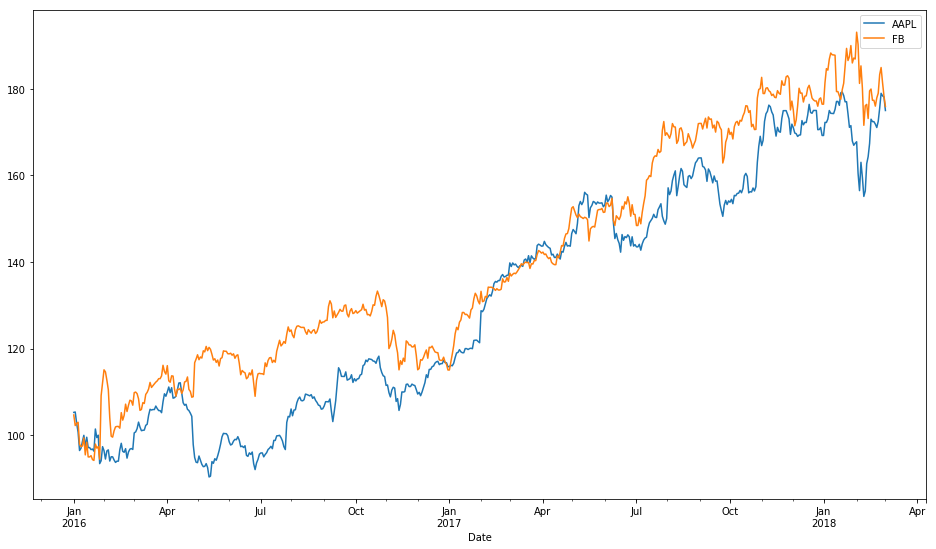

In [5]:
df[['AAPL', 'FB']].plot(figsize=(16, 9))

### Moving Windows

One important and simple timeseries analysis that we can perform is based on "Moving Windows" (also called "Rolling Windows"). We'll analyze different statistical indicators based on these moving periods. It's used to reduce the noise in the data and give you a more general idea of how a timeseries performed. For example, we can get the "average" price "every 30 days":

*Read more about Moving Average [here](https://en.wikipedia.org/wiki/Moving_average).*

In [6]:
df['GOOG'].rolling(30).mean().head(40)

Date
2016-01-01           NaN
2016-01-04           NaN
2016-01-05           NaN
2016-01-06           NaN
2016-01-07           NaN
2016-01-08           NaN
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14           NaN
2016-01-15           NaN
2016-01-18           NaN
2016-01-19           NaN
2016-01-20           NaN
2016-01-21           NaN
2016-01-22           NaN
2016-01-25           NaN
2016-01-26           NaN
2016-01-27           NaN
2016-01-28           NaN
2016-01-29           NaN
2016-02-01           NaN
2016-02-02           NaN
2016-02-03           NaN
2016-02-04           NaN
2016-02-05           NaN
2016-02-08           NaN
2016-02-09           NaN
2016-02-10           NaN
2016-02-11    715.600333
2016-02-12    713.051000
2016-02-15    711.069667
2016-02-16    709.350333
2016-02-17    708.176333
2016-02-18    707.208333
2016-02-19    706.756333
2016-02-22    706.437333
2016-02-23    705.430000
2016-02-24    705.396667
2016-02-25    705.09

As you can see, the first values are missing, because we need at least 30 values to compute the average. We'll plot it to see what it looks like, compared to the real data:

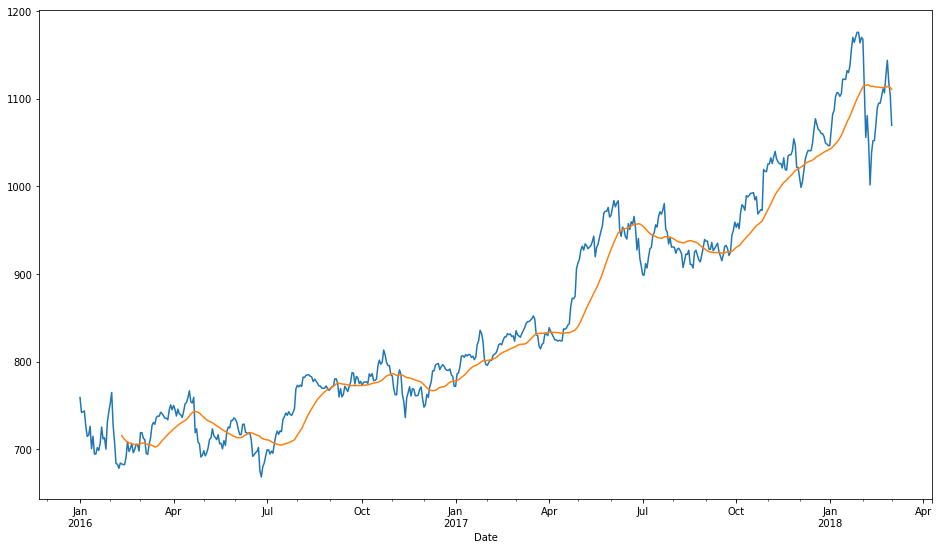

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))

df['GOOG'].plot(ax=ax)
df['GOOG'].rolling(30).mean().plot(ax=ax)

As you can see, the moving average has "smoothed out" the noise of the original data.

### Expanding

Expanding is similar to the concept of `rolling` (or _moving_), but it keeps increasing the window as it finds more data. Let's plot Google's stock prices and the total mean of the price:

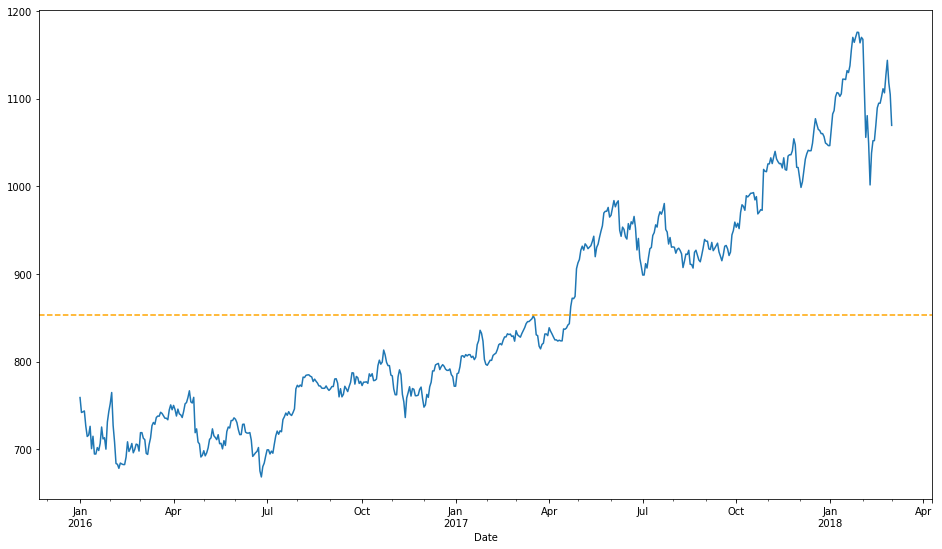

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))

df['GOOG'].plot(ax=ax)
ax.axhline(df['GOOG'].mean(), color='orange', linestyle='dashed')

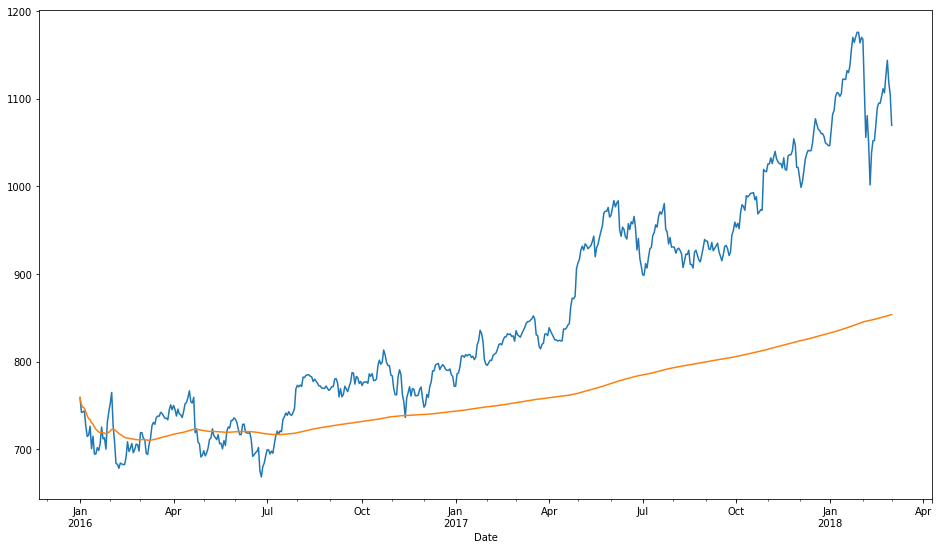

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))

df['GOOG'].plot(ax=ax)
df['GOOG'].expanding().mean().plot(ax=ax)

As you can see, the mean is growing, as it's being computed based on all the historic prices, until it reaches the mean of the total sample. Let's plot the overall mean again:

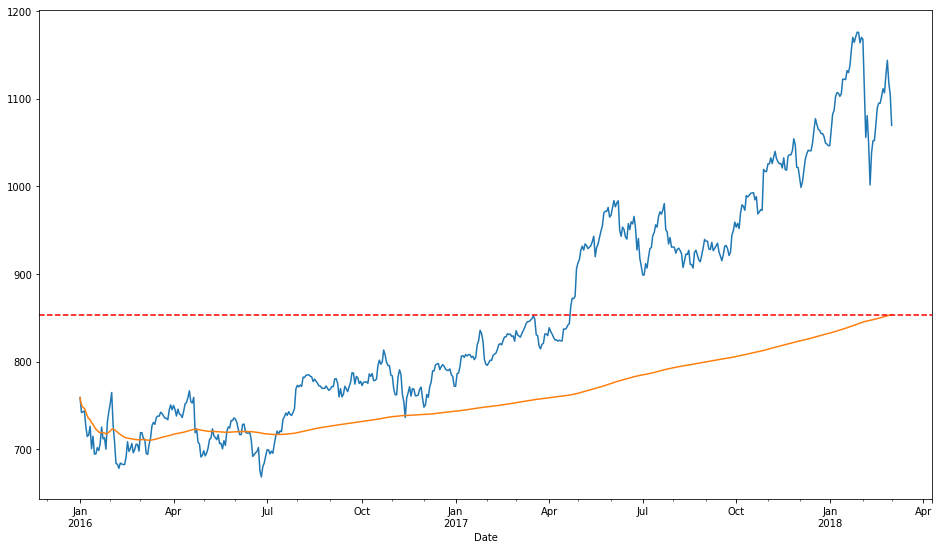

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))

df['GOOG'].plot(ax=ax)
df['GOOG'].expanding().mean().plot(ax=ax)
ax.axhline(df['GOOG'].mean(), color='red', linestyle='dashed')

### Moving Example: Bollinger Bands

[Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands) are one simple tool that plots a given stock price, its moving average and two "extreme" bands that are used to identify "high" or "low" prices. These bands are created based on a number of standard deviations away from the moving average.

In [11]:
google = df['GOOG'].copy().to_frame()
google.head()

,GOOG
Date,
2016-01-01,758.88
2016-01-04,741.84
2016-01-05,742.58
2016-01-06,743.62
2016-01-07,726.39


In [12]:
google['Moving Mean'] = google['GOOG'].rolling(30).mean()
google['Upper Band'] = google['Moving Mean'] + 2 * google['GOOG'].rolling(30).std()
google['Lower Band'] = google['Moving Mean'] - 2 * google['GOOG'].rolling(30).std()

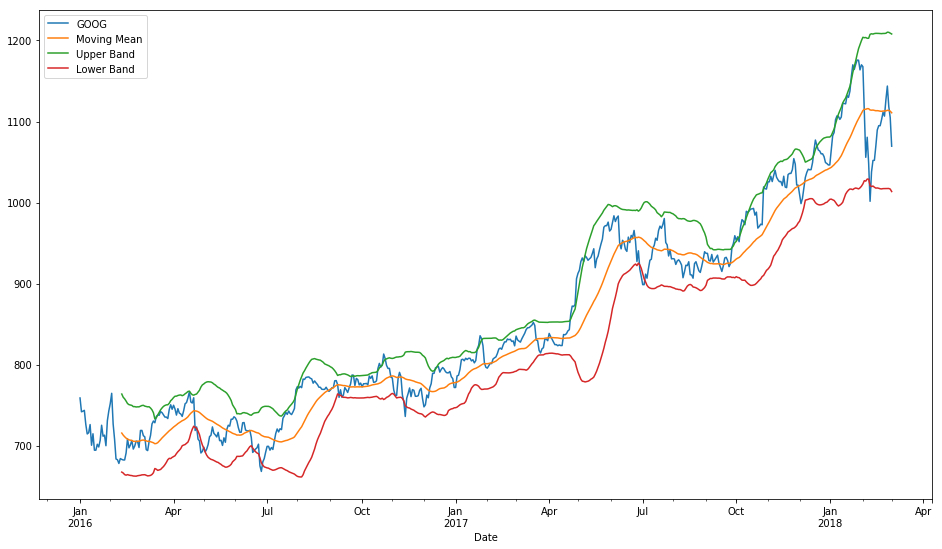

In [13]:
google.plot(figsize=(16, 9))

Seems like between October and December of 2016 we have two interesting prices, one high and one low, let's zoom in:

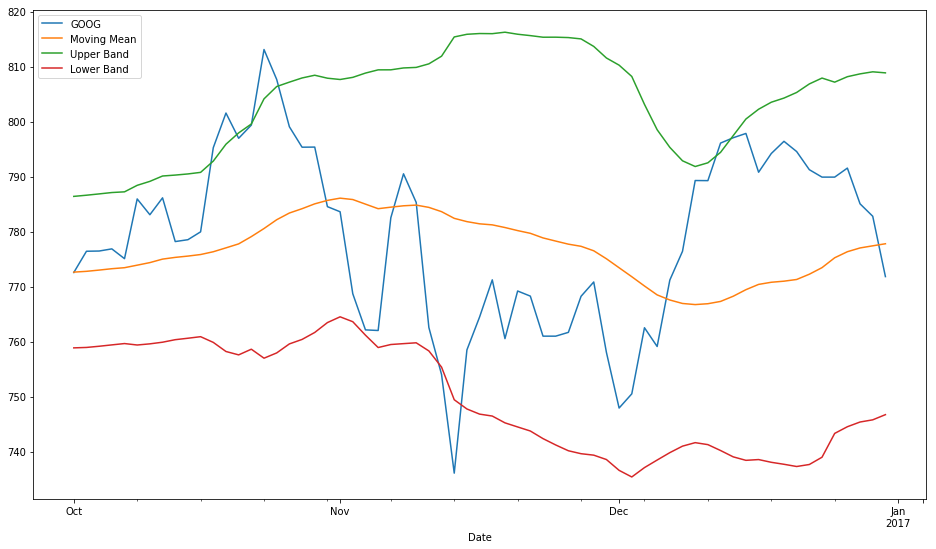

In [14]:
google.loc['2016-10': '2016-12'].plot(figsize=(16, 9))

In [15]:
subset = google.loc['2016-10': '2016-12']

In [16]:
low_high_prices = subset[(subset['GOOG'] > subset['Upper Band']) | (subset['GOOG'] < subset['Lower Band'])]
low_high_prices

,GOOG,Moving Mean,Upper Band,Lower Band
Date,,,,
2016-10-18,795.26,776.339333,792.822123,759.856544
2016-10-19,801.56,777.046333,795.891247,758.201420
2016-10-24,813.11,780.561333,804.138766,756.983901
2016-10-25,807.67,782.160667,806.380272,757.941061
2016-11-11,754.02,783.629333,811.898205,755.360461
2016-11-14,736.08,782.413333,815.397625,749.429041
2016-12-13,796.10,767.305333,794.414744,740.195922


In [17]:
low_high_prices.sort_values('GOOG', ascending=False)

,GOOG,Moving Mean,Upper Band,Lower Band
Date,,,,
2016-10-24,813.11,780.561333,804.138766,756.983901
2016-10-25,807.67,782.160667,806.380272,757.941061
2016-10-19,801.56,777.046333,795.891247,758.201420
2016-12-13,796.10,767.305333,794.414744,740.195922
2016-10-18,795.26,776.339333,792.822123,759.856544
2016-11-11,754.02,783.629333,811.898205,755.360461
2016-11-14,736.08,782.413333,815.397625,749.429041


### Pair Analysis

When Time Series have their indexes aligned, it's really simple to compare one to the other and analyze them as pairs. For example, we can analyze Apple and Facebook to see how their price differ using a simple "spread" comparison. What's the difference between the two prices?

\begin{equation*}
Spread   = APPL - FB
\end{equation*}

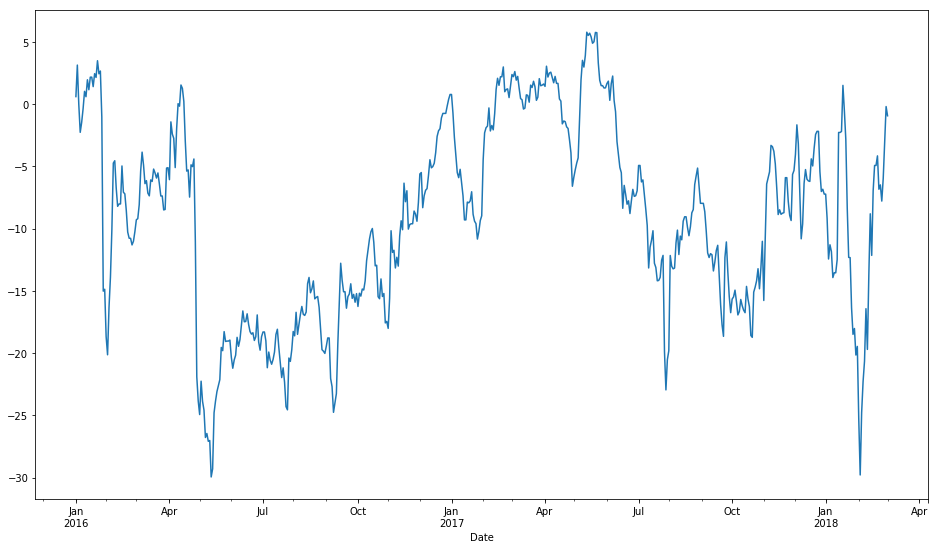

In [18]:
spread = df['AAPL'] - df['FB']
spread.plot(figsize=(16, 9))

As you can see, the prices biggest difference was around -\$30. They're usually at a similar price.

In [19]:
spread.min()

-29.939999999999998

### Correlation

Our previous spread analysis might suggest that both assets are "correlated". We can do a simple correlation analysis using the statistical definition of correlation. Pandas has a `corr` method that takes care of the math:

In [20]:
df['AAPL'].corr(df['FB'])

0.9589585339241035

**0.9!** not bad! Seems like both stocks are highly correlated. We could try plotting this correlation and see how's changing over time:

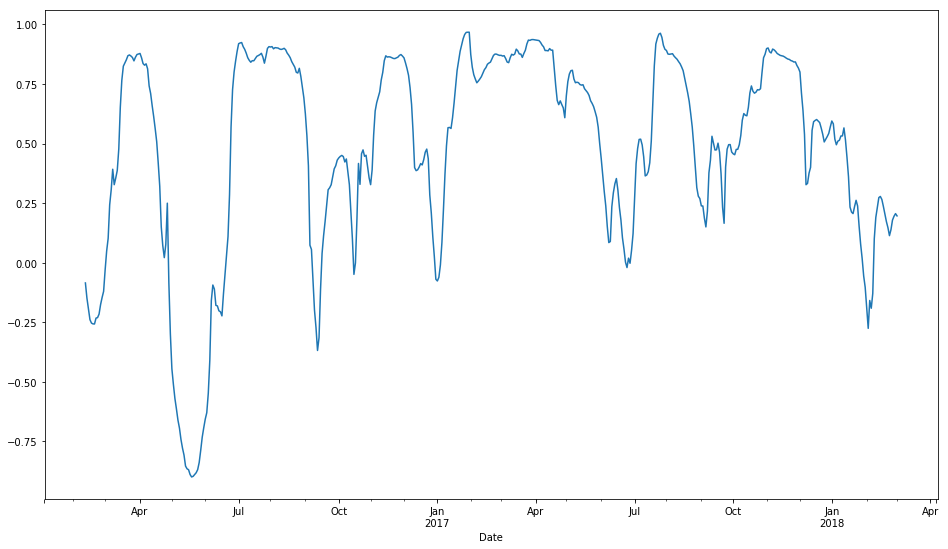

In [21]:
df['AAPL'].rolling(30).corr(df['FB']).plot(figsize=(16, 9))

If you want to compute correlations between multiple columns, you can use the `corrwith` method of a `DataFrame`:

In [22]:
df.corrwith(df['FB'])

AAPL    0.958959
AMZN    0.926380
FB      1.000000
GOOG    0.956119
MSFT    0.951590
dtype: float64